Part 1: Predicting Building Energy Efficiency (Supervised Learning)
RandomForestRegressor for supervised learning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)



In [9]:
df.head()

,WallArea,RoofArea,OverallHeight,GlazingArea,EnergyEfficiency
0,372,135,4.824401,0.164319,18.700166
1,247,183,9.097578,0.893773,11.748627
2,317,176,4.255870,0.575062,33.839428
3,392,118,6.032951,0.256768,31.640361
4,267,174,5.275825,0.236790,26.259739


In [10]:
# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

In [12]:
X.head()

,WallArea,RoofArea,OverallHeight,GlazingArea
0,372,135,4.824401,0.164319
1,247,183,9.097578,0.893773
2,317,176,4.255870,0.575062
3,392,118,6.032951,0.256768
4,267,174,5.275825,0.236790


In [6]:
y.head()

0    18.700166
1    11.748627
2    33.839428
3    31.640361
4    26.259739
Name: EnergyEfficiency, dtype: float64

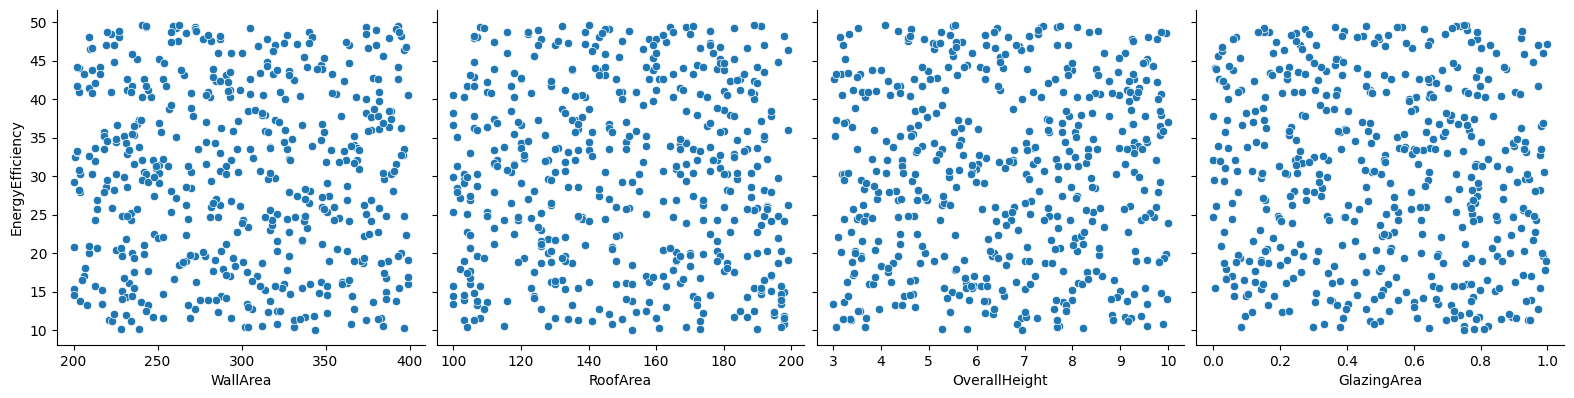

In [13]:
# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 146.02051889440582


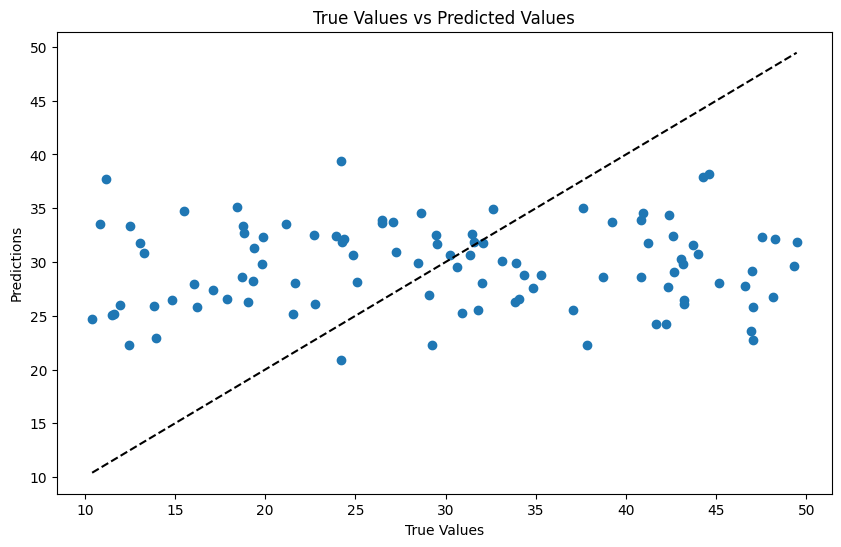

In [17]:
# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()